# FITBIT DATA ANALYSIS (DIPEN PRADHAN & ROSHANI SING) PART 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
dailyActivity = pd.read_csv("C:\\Users\\avili\\Downloads\\dailyActivity_merged.csv")
dailycalories = pd.read_csv("C:\\Users\\avili\\Downloads\\dailyCalories_merged.csv")
dailyIntensities  = pd.read_csv("C:\\Users\\avili\\Downloads\\dailyIntensities_merged.csv")
dailySteps = pd.read_csv("C:\\Users\\avili\\Downloads\\dailySteps_merged.csv")
heartrate_seconds = pd.read_csv("C:\\Users\\avili\\Downloads\\heartrate_seconds_merged (1).csv")
hourlyCalories = pd.read_csv("C:\\Users\\avili\\Downloads\\hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("C:\\Users\\avili\\Downloads\\hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("C:\\Users\\avili\\Downloads\\hourlySteps_merged.csv")
minuteCaloriesNarrow = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteCaloriesNarrow_merged (2).csv")
minuteCaloriesWide = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteIntensitiesWide_merged.csv")
minuteMETsNarrow = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteSleep_merged.csv")
minuteStepsNarrow = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteStepsNarrow_merged.csv")
minuteStepsWide = pd.read_csv("C:\\Users\\avili\\Downloads\\minuteStepsWide_merged.csv")
sleepDay = pd.read_csv("C:\\Users\\avili\\Downloads\\sleepDay_merged (1).csv")
weightLogInfo = pd.read_csv("C:\\Users\\avili\\Downloads\\weightLogInfo_merged (1).csv")

In [3]:
minuteIntensitiesWide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# creating a column named total_intensity by summing row wise intensity 00 to 59
minuteIntensitiesWide['total_intensity'] = minuteIntensitiesWide.iloc[:,2:].sum(axis=1)
minuteIntensitiesWide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59,total_intensity
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,1,1,0,1,1,0,0,0,0,14
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# create a new columns by slicing the ActivityHour Column
minuteIntensitiesWide['Date'] = minuteIntensitiesWide['ActivityHour'].str.slice(0,9)
minuteIntensitiesWide['Time'] = minuteIntensitiesWide['ActivityHour'].str.slice(9,-3)
minuteIntensitiesWide['am/pm'] = minuteIntensitiesWide['ActivityHour'].str.slice(-2,)
# to remove extra spaces from the begining and end 
minuteIntensitiesWide = minuteIntensitiesWide.apply(lambda x: x.str.strip() if x.dtype=="object" else x)
minuteIntensitiesWide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59,total_intensity,Date,Time,am/pm
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,1,1,0,0,0,0,14,4/13/2016,12:00:00,AM
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,1:00:00,AM
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,2:00:00,AM
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4/13/2016,3:00:00,AM
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,4:00:00,AM


In [6]:
# create a new dataframe with only morning data which is 'AM'
df_am = minuteIntensitiesWide[minuteIntensitiesWide['am/pm']=='AM']
df_am

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59,total_intensity,Date,Time,am/pm
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,1,1,0,0,0,0,14,4/13/2016,12:00:00,AM
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,1:00:00,AM
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,2:00:00,AM
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4/13/2016,3:00:00,AM
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4/13/2016,4:00:00,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5/13/2016,3:00:00,AM
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5/13/2016,4:00:00,AM
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5/13/2016,5:00:00,AM
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,8,5/13/2016,6:00:00,AM


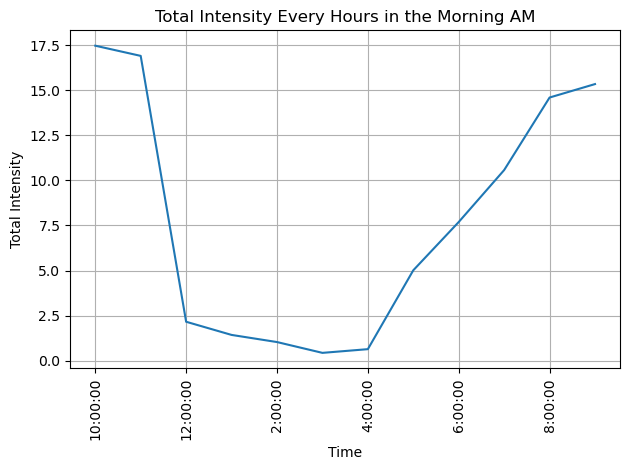

In [7]:
# group the data by each hour
df_am = df_am.groupby('Time')['total_intensity'].mean()
df_am.plot(kind="line", x='Time',y='total_intensity',grid=True)
plt.title('Total Intensity Every Hours in the Morning AM')
plt.ylabel('Total Intensity')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#The activity drops at night after midnight becuase most of the users take rest, 
#and it increases after 4 am when people start to wake up in the morning till 9am.
#It shows that most of the users are active during the early morning before they go to work.

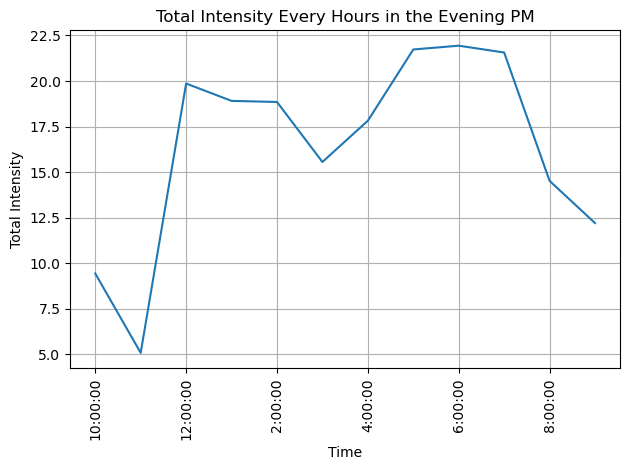

In [8]:
df_pm = minuteIntensitiesWide[minuteIntensitiesWide['am/pm']=='PM']
# group the data by each hour
df_pm = df_pm.groupby('Time')['total_intensity'].mean()
df_pm.plot(kind="line", x='Time',y='total_intensity',grid=True)
plt.title('Total Intensity Every Hours in the Evening PM')
plt.ylabel('Total Intensity')
plt.xticks(rotation=90)
plt.tight_layout()


In [ ]:
#The Intensity increases after 3pm and reamains high from 5 till 7 pm for most of the users. 
#It may be people going to walk or gym after work.

In [9]:
minuteStepsWide.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# add a column named total_steps by summing row wise steps 00 to 59
minuteStepsWide['total_steps'] =minuteStepsWide.iloc[:,2:].sum(axis=1)
minuteStepsWide.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59,total_steps
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,9,8,0,20,1,0,0,0,0,144
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# create a new column named 'Date' by slicing the ActivityHour Column
minuteStepsWide['Date'] = minuteStepsWide['ActivityHour'].str.slice(0,9)
minuteStepsWide['Time'] = minuteStepsWide['ActivityHour'].str.slice(9,-3)
minuteStepsWide['am/pm'] = minuteStepsWide['ActivityHour'].str.slice(-2,)
# to remove extra spaces from the begining and end 
minuteStepsWide = minuteStepsWide.apply(lambda x: x.str.strip() if x.dtype=="object" else x)
minuteStepsWide['Hour'] = minuteStepsWide['Time'].str.slice(0,2)
minuteStepsWide['Hour'] = minuteStepsWide['Hour'].apply(lambda x: x.strip(':'))
minuteStepsWide.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps55,Steps56,Steps57,Steps58,Steps59,total_steps,Date,Time,am/pm,Hour
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,1,0,0,0,0,144,4/13/2016,12:00:00,AM,12
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4/13/2016,1:00:00,AM,1
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4/13/2016,2:00:00,AM,2
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,36,4/13/2016,3:00:00,AM,3
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4/13/2016,4:00:00,AM,4


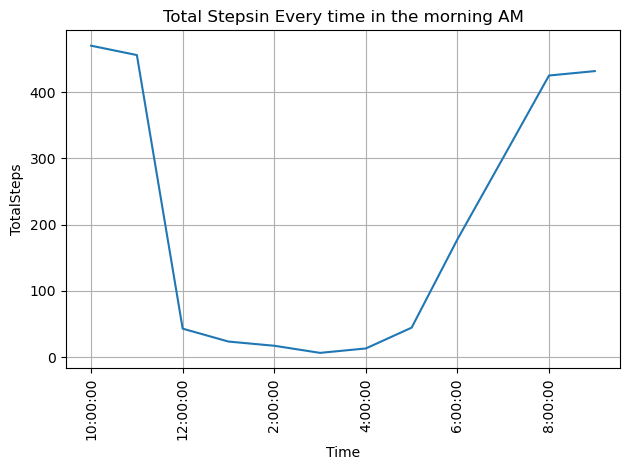

In [12]:
# create a new dataframe with only morning data which is 'AM' and ploting  the graph of morning(AM) wise Total Steps
df_am = minuteStepsWide[minuteStepsWide['am/pm']=='AM']
# group the data by each hour
df_am = df_am.groupby('Time')['total_steps'].mean()
df_am.plot(kind="line", x='Time',y='total_steps',grid=True)
plt.title('Total Stepsin Every time in the morning AM')
plt.ylabel('TotalSteps')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#It shows that the users starts activity after 4am in the morning with highest activity peak at 10 am.

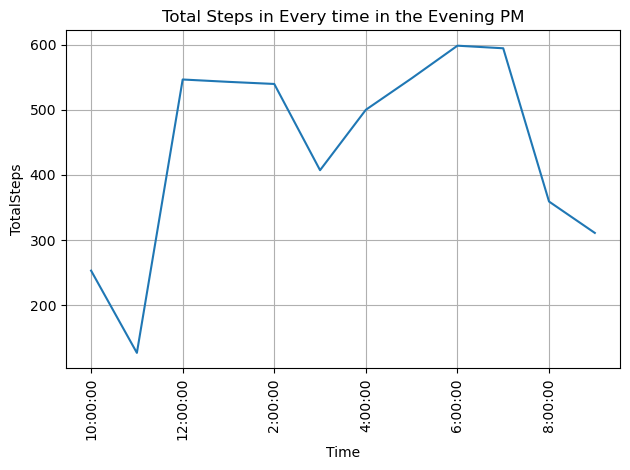

In [13]:
# create a new dataframe with only morning data which is 'AM' and ploting  the graph of evening(PM) wise Total Steps
df_pm = minuteStepsWide[minuteStepsWide['am/pm']=='PM']
# group the data by each hour
df_pm = df_pm.groupby('Time')['total_steps'].mean()
df_pm.plot(kind="line", x='Time',y='total_steps',grid=True)
plt.title('Total Steps in Every time in the Evening PM')
plt.ylabel('TotalSteps')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#In the evening, maximum steps are taken from 5pm to 8pm or above.

In [14]:
minuteCaloriesWide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


In [15]:
# add a column named total_steps by summing row wise steps 00 to 59
minuteCaloriesWide['total_calories'] =minuteCaloriesWide.iloc[:,2:].sum(axis=1)
minuteCaloriesWide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59,total_calories
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438,68.740098
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,48.133799
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,47.189999
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,52.695498
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,47.347299


In [17]:
# create  new columns named  by slicing the ActivityHour Column
minuteCaloriesWide['Date'] = minuteCaloriesWide['ActivityHour'].str.slice(0,9)
minuteCaloriesWide['Time'] = minuteCaloriesWide['ActivityHour'].str.slice(9,-3)
minuteCaloriesWide['am/pm'] = minuteCaloriesWide['ActivityHour'].str.slice(-2,)
# to remove extra spaces from the begining and end 
minuteCaloriesWide = minuteCaloriesWide.apply(lambda x: x.str.strip() if x.dtype=="object" else x)
minuteCaloriesWide['Hour'] = minuteCaloriesWide['Time'].str.slice(0,2)
minuteCaloriesWide['Hour'] = minuteCaloriesWide['Hour'].apply(lambda x: x.strip(':'))
minuteCaloriesWide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories55,Calories56,Calories57,Calories58,Calories59,total_calories,Date,Time,am/pm,Hour
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,1.8876,0.9438,0.9438,0.9438,0.9438,68.740098,4/13/2016,12:00:00,AM,12
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,48.133799,4/13/2016,1:00:00,AM,1
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,47.189999,4/13/2016,2:00:00,AM,2
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,52.695498,4/13/2016,3:00:00,AM,3
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,47.347299,4/13/2016,4:00:00,AM,4


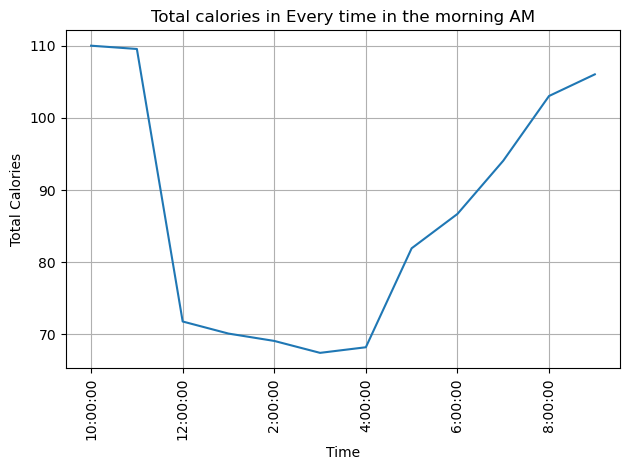

In [18]:
# create a new dataframe with only morning data which is 'AM' and ploting  the graph of morning(AM) wise Total Steps
df_am = minuteCaloriesWide[minuteCaloriesWide['am/pm']=='AM']
# group the data by each hour
df_am = df_am.groupby('Time')['total_calories'].mean()
df_am.plot(kind="line", x='Time',y='total_calories',grid=True)
plt.title('Total calories in Every time in the morning AM')
plt.ylabel('Total Calories')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#  Users are most active between 7:00 and 10:00 a.m., which is when most calories are burned.

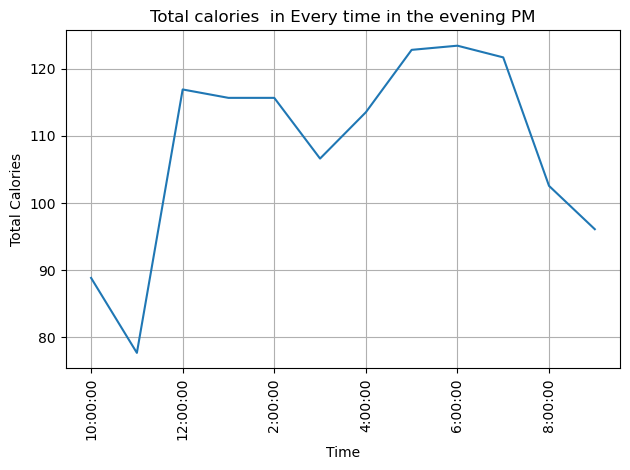

In [19]:
# create a new dataframe with only morning data which is 'AM' and ploting  the graph of morning(AM) wise Total Steps
df_pm = minuteCaloriesWide[minuteCaloriesWide['am/pm']=='PM']
# group the data by each hour
df_pm = df_pm.groupby('Time')['total_calories'].mean()
df_pm.plot(kind="line", x='Time',y='total_calories',grid=True)
plt.title('Total calories  in Every time in the evening PM')
plt.ylabel('Total Calories')
plt.xticks(rotation=90)
plt.tight_layout()